In [1]:

from fastfantasy import DataAccess

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


__Package Overview__:

My package provides access to historical scoring data for the professional golf association (PGA). I have collected the data by web scraping from ESPN. Also, I mapped the raw scoring data to DraftKings classic golf style scoring format. The table below provides more details on the three categories of fantasy scoring points, namely, Per hole scoring, Tournament finish scoring, and streaks and bonuses.  

_Per Hole Scoring_

|__Score Type__ | __Fantasy Points__ |
| :- | :- |
| Double eagle or better | 13 |
| Eagle | 8 |
| Birdie | 3 |
| Par | 0.5 |
| Bogey | -0.5 |
| Double or worse | -1|


_Tournament Finish Scoring_

|__Place Position__ | __Fantasy Points__ |
| :- | :- |
| 1st | 30  |
|2nd | 20  |
|3rd | 18  |
|4th | 16  |
|5th | 14  |
|6th | 12  |
|7th | 10  |
|8th|9 |
|9th|8 |
|10th|7 |
|11th – 15th|6 |
|16th – 20th|5 |
|21st – 25th|4 |
|26th – 30th|3 |
|31st – 40th|2 |
|41st – 50th| 1 |


_Streaks and Bonuses_

|__Streak Bonuses__ | __Fantasy Points__ |
| :- | :- |
| Streak of 3 Birdies or Better {Max 1 Per Round} | 3 |
| Bogey Free Round | 3 |
| All 4 Rounds Under 70 Strokes | 5 |
| Hole In One | 5 |




_Fantasy Scoring Notes_

- Ties for a finishing position will not reduce or average down points. For example, if 2 golfers tie for 3rd place, each will receive the 18 fantasy points for the 3rd place finish result.

- Playoff Holes will not count towards final scoring, with the exception of the "finishing position" scoring. For example, the golfer who wins the tournament will receive the sole award of 1st place points, but will not accrue points for their scoring result in the individual playoff holes.

- Golfers will receive fantasy points for all completed holes that we receive statistics for. If a golfer withdraws or is disqualified before completing a round, the golfer will receive fantasy points for all holes completed in that round that we receive statistics for. However, golfers who withdraw or are disqualified will not be eligible for a finishing position bonus.
Golfers must complete 18 holes to be eligible for a bogey free round bonus. If a round is shortened to less than 18 holes, no golfers will be eligible for the bonus in that round. If a golfer is disqualified after a round, that golfer is still eligible for the bogey free round bonus.

- Golfers must complete four 18 hole rounds to be eligible for the all 4 rounds under 70 strokes bonus. If a tournament is shortened to less than 4 rounds or a round is shortened to less than 18 holes, no golfers will be eligible for the bonus. If a tournament is more than 4 rounds, no golfers will be eligible for the bonus

__Module Descriptions__:

I will briefly outline how each module interacts with one another to accomplish the goal of scraping data from ESPN. The tournament module will get all of the tournaments for a given range of seasons. ESPN has a season schedule page with a list of all the tournaments. For each tournament on a season schedule page, I go to the tournament specific page to collect other information on the data, such as the tournament winner, date, etc. After, I save the tournament data into the raw tournament data folder for later access. I also perform filtering of the tournaments and save the file in the processed tournament data folder. I filter the tournament because of the mapping from raw scoring data to Draftkings fantasy contest scoring. I excluded tournaments such as charity events, match play events, or others that are not your typical tournament from my collection process. The historical module uses the filter tournaments, or as I named the saved file, valid tournaments. The historical data module is the largest and performs a lot of work. It finds all of the players in each tournament in the valid tournaments file. For each participant, the module collects a scorecard. Most scorecards either include two rounds or four rounds. This is the standard in competition for most players. However, this is not always the case. Some players can withdraw from a tournament early or even get disqualified. Also, ESPN’s site isn’t always correct. In some events, ESPN didn’t even have the data posted. There are also instances of certain players not having data even when they played in the tournament. To get around this, I had to do some manual entry. The historical data module will save each tournament by its tournament id in the data raw folder. Then I combine all of the tournaments into one file and call it historical player data (hpd). The start and end are the range of seasons given by the user.  Afterward,  the draftkings module performs the fantasy point mappings on the raw scorecard data. The table provided below goes into more detail about the different fantasy point scores that a player can receive over a tournament. Lastly, the fastfantasy module gives users access to the data they want. I have run the collection process for the 2018 season and saved the data in the corresponding folders mentioned. I will outline how you can run the process below in more detail. The overall time of the data collection process does take a long time to complete. I have tried to speed up the data collection time with the concurrent.futures module. The only difficulty is when I request the server frequently and get denied. 


__Historical Data API__:

I have provided several options to access historical player scoring data. The first option includes the raw scorecard data of each tournament over a given range of seasons. The second option includes the first option’s data plus DraftKings fantasy mappings for each raw scorecard data point. The last option only includes the DraftKings fantasy mappings for the raw scorecard data.


_First Option_

In [2]:

historical_data = DataAccess(2018)

raw_df = historical_data.raw()

raw_df.head()

,player_id,tournament_id,date,round_1_1,round_1_2,round_1_3,round_1_4,round_1_5,round_1_6,round_1_7,...,round_4_9_pts,round_4_10_pts,round_4_11_pts,round_4_12_pts,round_4_13_pts,round_4_14_pts,round_4_15_pts,round_4_16_pts,round_4_17_pts,round_4_18_pts
0,3448,3742,2018-01-04,4.0,3.0,4.0,4.0,3.0,3.0,5.0,...,birdie,par,bogie,eagle,par,birdie,birdie,birdie,par,par
1,9780,3742,2018-01-04,4.0,2.0,5.0,4.0,4.0,5.0,4.0,...,par,par,par,par,bogie,birdie,birdie,par,birdie,par
2,1225,3742,2018-01-04,4.0,3.0,4.0,3.0,4.0,4.0,4.0,...,birdie,par,par,par,par,par,birdie,birdie,par,par
3,5860,3742,2018-01-04,5.0,3.0,4.0,3.0,4.0,4.0,4.0,...,par,par,par,birdie,par,par,eagle,birdie,birdie,par
4,707,3742,2018-01-04,4.0,2.0,4.0,5.0,4.0,5.0,5.0,...,birdie,par,par,par,par,birdie,par,par,birdie,par


_Second Option_

In [3]:
full_df = historical_data.full()
full_df.head()

,player_id,tournament_id,date,round_1_1,round_1_2,round_1_3,round_1_4,round_1_5,round_1_6,round_1_7,...,rd_total_1,rd_total_2,rd_total_3,rd_total_4,under70_1,under70_2,under70_3,under70_4,fantasy_under70_pts,fantasy_total_points
0,3448,3742,2018-01-04,4.0,3.0,4.0,4.0,3.0,3.0,5.0,...,0.0,0.0,0.0,0.0,1,1,1,1,0,144.0
1,9780,3742,2018-01-04,4.0,2.0,5.0,4.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,1,1,1,1,0,120.5
2,1225,3742,2018-01-04,4.0,3.0,4.0,3.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,1,1,1,1,0,110.5
3,5860,3742,2018-01-04,5.0,3.0,4.0,3.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,1,1,1,1,0,107.5
4,707,3742,2018-01-04,4.0,2.0,4.0,5.0,4.0,5.0,5.0,...,0.0,0.0,0.0,0.0,1,1,1,1,0,104.0


## __Return Label__


__Below is the target variable ("fantasy_total_points") plotted for each point in the training set.__


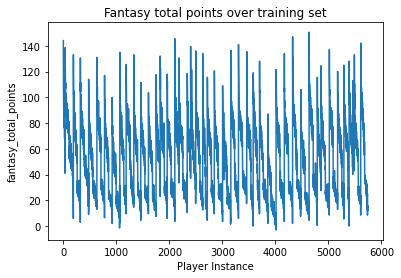

In [4]:
plt.plot(full_df["fantasy_total_points"])

plt.xlabel("Player Instance")
plt.ylabel("fantasy_total_points")

plt.title("Fantasy total points over training set");

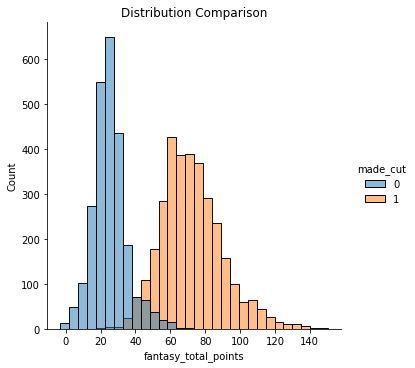

In [5]:
sns.displot(full_df, x="fantasy_total_points", hue="made_cut").set(title="Distribution Comparison")
plt.show();

_Third Option_

In [6]:
fantasy_df = historical_data.fantasy()
fantasy_df.head()

,player_id,tournament_id,date,fantasy_placing_pts,f_pts_1_1,f_pts_1_2,f_pts_1_3,f_pts_1_4,f_pts_1_5,f_pts_1_6,...,rd_total_1,rd_total_2,rd_total_3,rd_total_4,under70_1,under70_2,under70_3,under70_4,fantasy_under70_pts,fantasy_total_points
0,3448,3742,2018-01-04,30,0.5,0.5,0.5,0.5,8.0,3.0,...,0.0,0.0,0.0,0.0,1,1,1,1,0,144.0
1,9780,3742,2018-01-04,20,0.5,3.0,-0.5,0.5,3.0,-0.5,...,0.0,0.0,0.0,0.0,1,1,1,1,0,120.5
2,1225,3742,2018-01-04,18,0.5,0.5,0.5,3.0,3.0,0.5,...,0.0,0.0,0.0,0.0,1,1,1,1,0,110.5
3,5860,3742,2018-01-04,16,-0.5,0.5,0.5,3.0,3.0,0.5,...,0.0,0.0,0.0,0.0,1,1,1,1,0,107.5
4,707,3742,2018-01-04,16,0.5,3.0,0.5,-0.5,3.0,-0.5,...,0.0,0.0,0.0,0.0,1,1,1,1,0,104.0


_Entire Data Collection Process_

In [ ]:
historical_data.new_collection_process(2016, 2018, "full")